<a href="https://colab.research.google.com/github/prashanthdnss/Nithya_INFO5731_Fall2020/blob/master/First_Deliverable_Submission/Group6_IPL_Term_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tweepy  #Installing Tweepy for twitter data

In [2]:
#Program to get twitter data using Twitter API 

import json
import csv
import tweepy
import re
import os
def twitter_hashtag(api_key, api_key_secret, access_token, access_token_secret, hashtag):
    
    auth = tweepy.OAuthHandler(api_key, api_key_secret)
    auth.set_access_token(access_token, access_token_secret)

    api = tweepy.API(auth,wait_on_rate_limit=True)
    
    file_name = '_'.join(re.findall(r"#(\w+)", hashtag))

    with open('%s.csv' % (file_name), 'w') as file:

        w = csv.writer(file)

        w.writerow(['created', 'tweet_text', 'username', 'all_hashtags'])

        for tweet in tweepy.Cursor(api.search, q=hashtag+' -filter:retweets', lang="en", tweet_mode='extended').items(1000):
            w.writerow([tweet.created_at, tweet.full_text.replace('\n',' ').encode('utf-8'), tweet.user.screen_name.encode('utf-8'),[e['text'] for e in tweet._json['entities']['hashtags']]])
            


api_key = input('Please give twitter api key')
api_key_secret = input('Please give twitter api key secret')
access_token = input('Please give twitter access token')
access_token_secret = input('Please give twitter access token secret')
    
hashtag = input('enter the hashtag')

twitter_hashtag(api_key, api_key_secret, access_token, access_token_secret, hashtag)



Please give twitter api keyePjdnPqsmA5Mgjewf5i5Vtnuw
Please give twitter api key secretV83Stor4JRihnxggUa9OODxIrAc8EHmQdJxlnpxAGZXjqbJA7v
Please give twitter access token1287853629869821952-ZsnNF12Y53o5JfCOUBPn72lO0OJau1
Please give twitter access token secretTSYcER5dl5L72dcbpo8f0LzQqfn6qX3r2n1QsLpOGxRAz
enter the hashtag#IPL2020


In [4]:
#Saving the twitter data to a csv file
import pandas as pd
tweets=pd.read_csv("IPL2020.csv",encoding = "ISO-8859-1")
tweets.head()

,created,tweet_text,username,all_hashtags
0,2020-11-09 04:49:21,b'Look at #SRH youngster Priyam Garg after Kan...,b'SteadyTheShip',"['SRH', 'SRHvDC', 'DCvSRH', 'IPL2020']"
1,2020-11-09 04:49:16,b'This is Mr.360\xc2\xb0 @ABdeVilliers17 . Mos...,b'imsapien',"['Cricket', 'IPL2020', 'Eliminater', 'IPLQuali..."
2,2020-11-09 04:48:52,"b""Great things happen to those who don't stop ...",b'CricketGirl_45',"['RohitSharma', 'MumbaiIndians', 'IPL2020', 'I..."
3,2020-11-09 04:48:41,b'T Natarajan made a mark with his yorkers in ...,b'ESPNcricinfo',['IPL2020']
4,2020-11-09 04:47:57,b'#IPL2020 Final: Marcus Stoinis warning to @m...,b'InsideSportIND',"['IPL2020', 'iplseason13', 'IPLfinal', 'Mumbai..."


In [5]:
#Functions to clean Tweets

def remove_tag(string):
    tweet_text=re.sub('<.*?>','',string)
    return tweet_text
def remove_mention(tweet_text):
    line=re.sub(r'@\w+','',tweet_text)
    return line
def remove_hash(tweet_text):
    line=re.sub(r'#\w+','',tweet_text)
    return line

def remove_newline(string):
    tweet_text=re.sub('\n','',string)
    return tweet_text
def remove_url(string): 
    tweet_text = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+','',string)
    return tweet_text
def remove_number(tweet_text):
    line=re.sub(r'[0-9]+','',tweet_text)
    return line
def remove_punct(tweet_text):
    line = re.sub(r'[!"\$%&\'()*+,\-.\/:;=#@?\[\\\]^_`{|}~]*','',tweet_text)
    return line
def text_strip(string):
    line=re.sub('\s{2,}', ' ', string.strip())
    return line



In [6]:
!pip install nltk #installing NLTK Package

In [7]:
#Clensing the tweets

import nltk

tweets['refine_text']=tweets['tweet_text'].str.lower()
tweets['refine_text']=tweets['refine_text'].apply(lambda x:remove_tag(str(x)))
tweets['refine_text']=tweets['refine_text'].apply(lambda x:remove_mention(str(x)))
tweets['refine_text']=tweets['refine_text'].apply(lambda x:remove_hash(str(x)))
tweets['refine_text']=tweets['refine_text'].apply(lambda x:remove_newline(x))
tweets['refine_text']=tweets['refine_text'].apply(lambda x:remove_url(x))
tweets['refine_text']=tweets['refine_text'].apply(lambda x:remove_number(x))
tweets['refine_text']=tweets['refine_text'].apply(lambda x:remove_punct(x))

tweets['refine_text']=tweets['refine_text'].apply(lambda x:text_strip(x))

tweets['text_length']=tweets['refine_text'].str.split().map(lambda x: len(x))

#Remove noise
tweets['refine_text'] = tweets['refine_text'].str.replace('[^\w\s]','')


#Remove stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
tweets['refine_text'] = tweets['refine_text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))



#stemming
from nltk.stem import PorterStemmer
st = PorterStemmer()
tweets['refine_text'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

#lemmatization
!pip install -U textblob
from textblob import Word
import nltk
nltk.download('wordnet')

tweets['refine_text'] = tweets['refine_text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
Requirement already up-to-date: textblob in /usr/local/lib/python3.6/dist-packages (0.15.3)
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [9]:
#Saaving the clensed data to a new CSV file
tweets.to_csv('clean_tweets.csv') 

In [10]:
# importing pandas module  
import pandas as pd 
  
# importing module for regex 
import re 
# importing numpy module 
import numpy as np
# importing P=mathplot lib
import matplotlib.pyplot as plt
# reading csv file from url  
dat = pd.read_csv("/content/clean_tweets.csv")
selected_columns = dat[["refine_text"]]
data = selected_columns.copy()


In [11]:
# count of occurrence of each team mentions and creating new column 
data["count1"]= data["refine_text"].str.count("csk", re.I) 
data["count2"]= data["refine_text"].str.count( "DC", re.I) 
data["count3"]= data["refine_text"].str.count( "KXIP", re.I) 
data["count4"]= data["refine_text"].str.count( "KKR", re.I) 
data["count5"]= data["refine_text"].str.count( "MI", re.I) 
data["count6"]= data["refine_text"].str.count( "RR", re.I) 
data["count7"]= data["refine_text"].str.count( "RCB", re.I) 
data["count8"]= data["refine_text"].str.count( "SRH", re.I)

In [12]:
# count of occurrence of each team mention with their state name and creating new column 
data["count11"]= data["refine_text"].str.count("Chennai", re.I) 
data["count22"]= data["refine_text"].str.count( "Delhi", re.I) 
data["count33"]= data["refine_text"].str.count( "Punjab", re.I) 
data["count44"]= data["refine_text"].str.count( "Kolkata", re.I) 
data["count55"]= data["refine_text"].str.count( "Mumbai", re.I) 
data["count66"]= data["refine_text"].str.count( "Rajasthan", re.I) 
data["count77"]= data["refine_text"].str.count( "Bangalore", re.I) 
data["count88"]= data["refine_text"].str.count( "Hyderabad", re.I)

In [13]:
#aggrigating the total mentions
data["csk"] = data["count1"] + data["count11"]
data["DC"] = data["count2"] + data["count22"]
data["KXIP"]= data["count3"] + data["count33"]
data["KKR"]= data["count4"] + data["count44"]
data["MI"]= data["count5"] + data["count55"]
data["RR"]= data["count6"] + data["count66"]
data["RCB"]= data["count7"] + data["count77"]
data["SRH"]= data["count8"] + data["count88"]

In [14]:
data

,refine_text,count1,count2,count3,count4,count5,count6,count7,count8,count11,count22,count33,count44,count55,count66,count77,count88,csk,DC,KXIP,KKR,MI,RR,RCB,SRH
0,blook youngster priyam garg kane williamson ma...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,bthis mrxcxb dangerous animal cricket xfxfxx,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,bgreat thing happen dont stop believing trying...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,bt natarajan made mark yorkers xfxfxxc see pla...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,b final marcus stoinis warning check,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,bcongratulations entering final first time xfx...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
996,bwell played ur fight back frm th ending rd pl...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
997,bshikhar dhawan would take another former team...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
998,bif winning heart art kane williamson artistxe...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
#dropping the previous count coloumns to clean the dataframe
data1=data.drop(['count1', 'count11','count2','count22','count3','count33','count4','count44','count5','count55','count6','count66','count7','count77','count8','count88'], axis=1)

In [16]:
#aggrigating the total mentions team wise and saving the results to a dictionary
dict = data1.sum(axis = 0, skipna = True)

In [17]:
dict

refine_text    blook youngster priyam garg kane williamson ma...
csk                                                           53
DC                                                           261
KXIP                                                          23
KKR                                                           19
MI                                                           296
RR                                                            76
RCB                                                           69
SRH                                                           97
dtype: object

In [18]:
#saving the values to an array to use the results to plot
y= dict.values
z =np.delete(y, 0, 0)
z.tolist()


[53, 261, 23, 19, 296, 76, 69, 97]

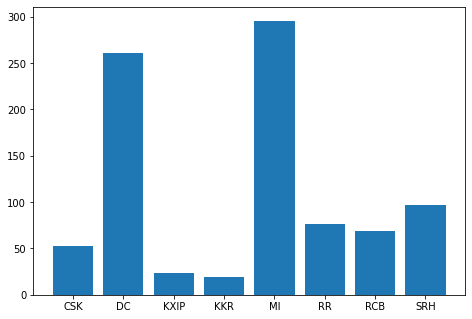

In [19]:
#plotting the results
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
q = ["CSK" , "DC","KXIP", "KKR","MI","RR","RCB","SRH"]
ax.bar(q,z)
plt.show()

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


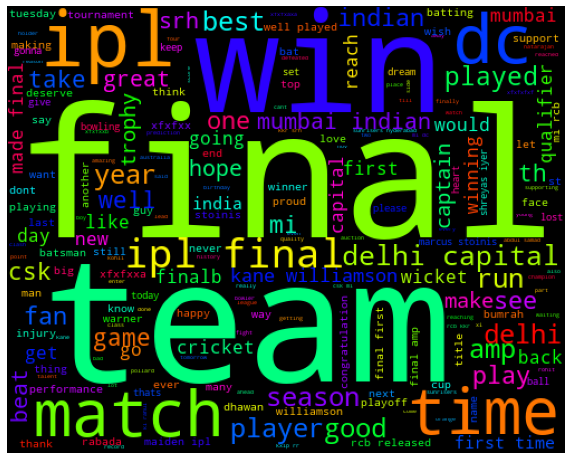

In [20]:
#Importing the packages
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from textblob import TextBlob
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('stopwords')


#Building a word cloud:
words = pd.Series(tweets["refine_text"].tolist()).astype(str)

stop_words = ["https", "co", "rt"]
stop = set(stopwords.words('english'))

for i in range(0, len(words)):
    words[i] = " ".join([x for x in words[i].lower().split() if x not in stop_words])
    words[i] = " ".join([x for x in words[i].lower().split() if x not in stop])

stop = set(stopwords.words('english'))    
cloud = WordCloud(width=500, height=400,
                  stopwords=(stop), 
                  colormap='hsv').generate(''.join(words.astype(str)))
plt.figure(figsize=(10, 10))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [21]:

import numpy as np 
import pandas as pd 
import os
import itertools

#plots
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import CountVectorizer

from PIL import Image
from nltk.corpus import stopwords
stop=set(stopwords.words('english'))
from nltk.util import ngrams



def ngram_df(corpus,nrange,n=None):
    vec = CountVectorizer(stop_words = 'english',ngram_range=nrange).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    total_list=words_freq[:n]
    df=pd.DataFrame(total_list,columns=['text','count'])
    return df
unigram_df=ngram_df(tweets['refine_text'],(1,1),20)
bigram_df=ngram_df(tweets['refine_text'],(2,2),20)
trigram_df=ngram_df(tweets['refine_text'],(3,3),20)

In [22]:
bigram_df=ngram_df(tweets['refine_text'],(2,2),20)
trigram_df=ngram_df(tweets['refine_text'],(3,3),20)
fig = make_subplots(
    rows=3, cols=1,subplot_titles=("Unigram","Bigram",'Trigram'),
    specs=[[{"type": "scatter"}],
           [{"type": "scatter"}],
           [{"type": "scatter"}]
          ])

fig.add_trace(go.Bar(
    y=unigram_df['text'][::-1],
    x=unigram_df['count'][::-1],
    marker={'color': "blue"},  
    text=unigram_df['count'],
    textposition = "outside",
    orientation="h",
    name="Months",
),row=1,col=1)

fig.add_trace(go.Bar(
    y=bigram_df['text'][::-1],
    x=bigram_df['count'][::-1],
    marker={'color': "blue"},  
    text=bigram_df['count'],
     name="Days",
    textposition = "outside",
    orientation="h",
),row=2,col=1)

fig.add_trace(go.Bar(
    y=trigram_df['text'][::-1],
    x=trigram_df['count'][::-1],
    marker={'color': "blue"},  
    text=trigram_df['count'],
     name="Days",
    orientation="h",
    textposition = "outside",
),row=3,col=1)

fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(title_text='Top N Grams',xaxis_title=" ",yaxis_title=" ",
                  showlegend=False,title_x=0.5,height=1200,template="plotly_dark")
fig.show()

In [23]:
#sentimmental Analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *

from nltk import tokenize
import nltk
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

tweets['sentiment_compound_polarity']=tweets.refine_text.apply(lambda x:sid.polarity_scores(x)['compound'])
tweets['sentiment_neutral']=tweets.refine_text.apply(lambda x:sid.polarity_scores(x)['neu'])
tweets['sentiment_negative']=tweets.refine_text.apply(lambda x:sid.polarity_scores(x)['neg'])
tweets['sentiment_pos']=tweets.refine_text.apply(lambda x:sid.polarity_scores(x)['pos'])
tweets['sentiment_type']=''
tweets.loc[tweets.sentiment_compound_polarity>0,'sentiment_type']='POSITIVE'
tweets.loc[tweets.sentiment_compound_polarity==0,'sentiment_type']='NEUTRAL'
tweets.loc[tweets.sentiment_compound_polarity<0,'sentiment_type']='NEGATIVE'
tweets.head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,created,tweet_text,username,all_hashtags,refine_text,text_length,sentiment_compound_polarity,sentiment_neutral,sentiment_negative,sentiment_pos,sentiment_type
0,2020-11-09 04:49:21,b'Look at #SRH youngster Priyam Garg after Kan...,b'SteadyTheShip',"['SRH', 'SRHvDC', 'DCvSRH', 'IPL2020']",blook youngster priyam garg kane williamson ma...,40,0.6969,0.737,0.058,0.205,POSITIVE
1,2020-11-09 04:49:16,b'This is Mr.360\xc2\xb0 @ABdeVilliers17 . Mos...,b'imsapien',"['Cricket', 'IPL2020', 'Eliminater', 'IPLQuali...",bthis mrxcxb dangerous animal cricket xfxfxx,9,-0.4767,0.617,0.383,0.000,NEGATIVE
2,2020-11-09 04:48:52,"b""Great things happen to those who don't stop ...",b'CricketGirl_45',"['RohitSharma', 'MumbaiIndians', 'IPL2020', 'I...",bgreat thing happen dont stop believing trying...,21,0.8219,0.602,0.000,0.398,POSITIVE
3,2020-11-09 04:48:41,b'T Natarajan made a mark with his yorkers in ...,b'ESPNcricinfo',['IPL2020'],bt natarajan made mark yorkers xfxfxxc see pla...,19,0.3400,0.806,0.000,0.194,POSITIVE
4,2020-11-09 04:47:57,b'#IPL2020 Final: Marcus Stoinis warning to @m...,b'InsideSportIND',"['IPL2020', 'iplseason13', 'IPLfinal', 'Mumbai...",b final marcus stoinis warning check,8,-0.3400,0.625,0.375,0.000,NEGATIVE


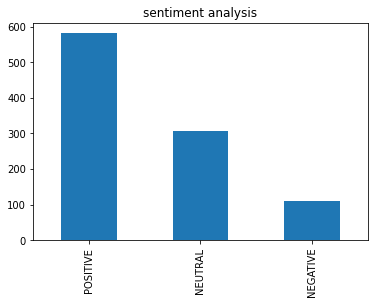

In [24]:
tweets.sentiment_type.value_counts().plot(kind='bar',title="sentiment analysis")

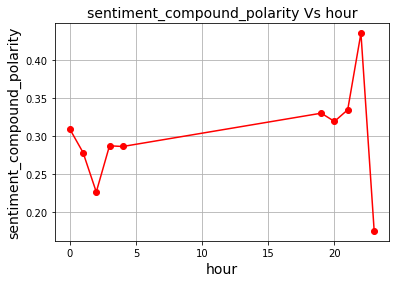

In [26]:
#Polarity of tweets hour wise
import pandas as pd
import matplotlib.pyplot as plt

tweets['hour'] = pd.DatetimeIndex(tweets['created']).hour
tweets['date'] = pd.DatetimeIndex(tweets['created']).date
tweets['minute'] = pd.DatetimeIndex(tweets['created']).minute
df=(tweets.groupby('hour',as_index=False).sentiment_compound_polarity.mean())
  
plt.plot(df['hour'], df['sentiment_compound_polarity'], color='red', marker='o')
plt.title('sentiment_compound_polarity Vs hour', fontsize=14)
plt.xlabel('hour', fontsize=14)
plt.ylabel('sentiment_compound_polarity', fontsize=14)
plt.grid(True)
plt.show()